# Data Science Assignment

### 20/10/2021 


<div class="alert alert-block alert-warning">

<b>Note: This file aims to simulate a sample from a DGP, and minimize a squared loss function. The aim of this assignment is to examine the bias-variance tradeoff.</b> 
</div>


**First**:  we will install needed packages. and set the seed. <br>
You would want to set the working directory with setwd() as well- but thats not really relevant on an assignment. 

In [5]:
library(MASS)
set.seed(2021)
ptm <- proc.time() 

**Second**, we will generate the **test** data. <br>
* This corresponds to Q1(a) <br>
<br>
We start by specifying:
* The number of observations 
* The vector of beta values 
* The variance-covariance matrix 
* The vector of means

Using this information, we will generate **X** : the vector of exogenous variables

Using **X** and $\beta$ and $\epsilon$ , we will add **Y** to the data frame <br>
We will also add f(x) to the dataframe, - which is just $Y - \epsilon $ <br>
<br>
The test data frame, named *test*,  should then look like: <br> <br>

| $X_1$     | $X_2$     | $X_1^2$     | $X_2^2$     | $X_1^3$     | $X_2^3$      | $\epsilon$    | $Y$       | $ f(\textbf{x}) $  |
|-----------|-----------|-------------|-------------|-------------|--------------|---------------|-----------|-----------|   
| $X_{1,1}$ | $X_{1,2}$ | $X_{1,1}^2$ | $X_{1,2}^2$ | $X_{1,1}^3$ | $X_{1,2}^3 $ | $\epsilon_1 $ | $ Y_1 $   | $f(\textbf{x}_1)$  |  
| $\vdots $ | $\vdots $ | $\vdots $   | $\vdots $   | $\vdots $   | $\vdots $    | $\vdots $     | $\vdots $ | $\vdots $ |  
| $X_{n,1}$ | $X_{n,2}$ | $X_{n,1}^2$ | $X_{n,2}^2$ | $X_{n,1}^3$ | $X_{n,2}^3 $ | $\epsilon_n $ | $ Y_n $   | $f(\textbf{x}_n)$  | 

<br> 
<br> 

The vector of beta, named *beta*, looks like <br> 
<br> 

$\begin{matrix}
\beta_0\\
\beta_1\\
\vdots\\
\beta_6\\
\end{matrix}$


_________________________________________________________________________________________________________________________
And the Y vector is obtained through the following multiplication by subsetting the relevant matrices and vectors: <br> <br>

$\begin{bmatrix}
Y_1 \\
Y_2 \\
\vdots\\
Y_n\\
\end{bmatrix}$ $=$
$\beta_0 + $ 
$\begin{bmatrix}
X_{1,1} & X_{1,2} & X_{1,1}^2 & X_{1,2}^2 & X_{1,1}^3 & X_{1,2}^3 \\
X_{2,1} & X_{2,2} & X_{2,1}^2 & X_{2,2}^2 & X_{2,1}^3 & X_{2,2}^3 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
X_{n,1} & X_{n,2} & X_{n,1}^2 & X_{n,2}^2 & X_{n,1}^3 & X_{n,2}^3 \\
\end{bmatrix} $ $\times$ $\begin{bmatrix}
\beta_1\\
\vdots\\
\beta_6\\
\end{bmatrix}$ $+$ $\begin{bmatrix}
\epsilon_1\\
\epsilon_2\\
\vdots\\
\epsilon_n
\end{bmatrix}$ <br> <br>
Such that the dimensions are: <br>
$(n,1)=(1,1) + (n,6) \times (6,1) + (n,1)$

In [6]:
#First we specify the sample size: 
n <- 1000

#Then we specify our vector of beta values
beta<- matrix(c(1,0.5,0.5,-0.5,-0.5,0.5,0.5))

# We specify our variance-covariance 
covMatrix <- matrix(c(1,-0.5,0,-0.5,1,0,0,0,1),nrow = 3, ncol=3, 
                    dimnames = list(c("X1","X2","e"),
                                    c("X1","X2","e")))

#We specify our vector of mean values. 
meanVector<- c(-0.4,0.7,0)

#And we generate a data frame from the multivariate normal distribution
test <- data.frame(mvrnorm(n=n , mu=meanVector , covMatrix))
#This data frame only has X1, X2, and epsilon. 

#We test our generated data to see if it indeed has the right covariance matrix. 
cov(test) # the variables have the right variance-covariance matrix.

#now we will add the squared and cubed terms to the data frame. 
test <- cbind(test, X1sq=test[,1]^2, X2sq=test[,2]^2 ,
              X1cub=test[,1]^3 , X2cub=test[,2]^3)

#now we will re-order them for easier matrix multiplication!
test <- test[,c("X1", "X2", "X1sq",
                "X2sq", "X1cub", "X2cub", "e")]

#now we will compute the Y: 
Y <- beta[1] + as.matrix(test[,1:6])%*%as.matrix(beta[2:7,])  + test[7]
names(Y)<-"Y" #just naming the Y. 
#the above matrix operation multiplies the vector
#of betas from beta1 to beta 6 by the vector of X. 
#note, a constant added to a matrix adds the constant to every element in the matrix.
#obviously, a vector is a 1 column/row matrix. 

#attach it to the data frame
test <- cbind(test, Y=Y)

#add f(x) to the data frame (for later): 
fx <- beta[1] + as.matrix(test[,1:6])%*%as.matrix(beta[2:7,])   
test <- cbind(test, fx=fx)

#to check we got things right: 
lm(Y ~ X1+ X2 + X1sq +X2sq +X1cub+ X2cub, test)


,X1,X2,e
X1,1.00256167,-0.52096230,0.01010181
X2,-0.52096230,1.07199231,-0.01107068
e,0.01010181,-0.01107068,1.03574148



Call:
lm(formula = Y ~ X1 + X2 + X1sq + X2sq + X1cub + X2cub, data = test)

Coefficients:
(Intercept)           X1           X2         X1sq         X2sq        X1cub  
     1.0637       0.5352       0.5154      -0.5010      -0.5263       0.4911  
      X2cub  
     0.5031  


**Third**:  <br>
We will make a sampleMaker() function.<br>
The sampleMaker() function will create all of the **training** data sets. <br> 
This makes samples of size 1,000 according to the DGP specified in 1.1 and 1.2. <br> 
It is basically a copy of the last box in a function so we can use it iteratively in an easier way. <br> <br>
This function is not commented because it is explained in the last box.

In [7]:
sampleMaker <- function(){
    #this function creates samples according to DGP specified in the assignment. 
    n <- 1000
    beta<- matrix(c(1,0.5,0.5,-0.5,-0.5,0.5,0.5))
    covMatrix <- matrix(c(1,-0.5,0,-0.5,1,0,0,0,1),nrow = 3, ncol=3,
                        dimnames = list(c("X1","X2","e"), c("X1","X2","e")))
    meanVector<- c(-0.4,0.7,0)
    dataframeName <- data.frame(mvrnorm(n=n ,
                                        mu=meanVector , covMatrix))  
    #this generates a data frame with X1, X2, epsilon using the provided cov matrix
    dataframeName <- cbind(dataframeName,
                           X1sq=dataframeName[,1]^2, X2sq=dataframeName[,2]^2 ,
                           X1cub=dataframeName[,1]^3 , X2cub=dataframeName[,2]^3)
    dataframeName <- dataframeName[,c("X1", "X2", "X1sq",
                                      "X2sq", "X1cub", "X2cub", "e")]
    Y<-beta[1]+as.matrix(dataframeName[,1:6])%*%as.matrix(beta[2:7,])+dataframeName[7]
    names(Y)<-"Y"
    dataframeName <- cbind(dataframeName, Y=Y)
    fx <- beta[1] + as.matrix(dataframeName[,1:6])%*%as.matrix(beta[2:7,]) 
    test <- cbind(test, fx=fx)
    return(dataframeName)
}

**Fourth**: <br>
We will make 3 functions to compute a(p), b(p), c(p)  <br> <br> 

These functions will take two inputs: <br> <br>

1. *test* : this is the test data set, named globally as *test*, sampled from the DGP earlier. Its dimensions are (9,n) <br> <br> 

2. *predictionOnTestSample* : this is a matrix of size $(R\times n)$ since R=1,000 and n=1,000 , it will be of size $(1,000\times 1,000) $. Basically, it is just a matrix of predicted values using the test dataframe. <br> <br> 





In [8]:
ap <- function(predictionOnTestSample, test){
    
    vectorOfSquaredDifferences<-vector(length=length(predictionOnTestSample[1,]))
    #length is R = number of columns 
    
    for (r in 1:length(predictionOnTestSample[1,])){
        vectorOfSquaredDifferences[r] <- mean((predictionOnTestSample[,r]-test$Y)^2) 
        #subtract vector test$Y from vector of predictions,
        #square it, find mean of vector.
        #the length of subsequent vector will be R. 
    }
    return(mean(vectorOfSquaredDifferences)) #returns mean over sampling distribution
}


bp <- function(predictionOnTestSample, test){
    
    
    vectorOfMeans= vector(length=length(  test[[9]])   )

    for (i in 1:length(test[[9]] )  ){

        
        vectorOfMeans[i]= mean(predictionOnTestSample[i,])
        }
    return(mean((vectorOfMeans-test[[9]])^2)) 
    #I don't see a need to average over the sampling distribution here. 
}




cp <- function(predictionOnTestSample, test){
    vectorOfDifferences=vector(length=length(predictionOnTestSample[1,]))
    vectorOfMeans=vector(length=length(test[[8]]))
    
    for (i in 1:length(test[[8]])){
    
        for (r in 1:length(predictionOnTestSample[1,])){


            vectorOfDifferences[r]=(predictionOnTestSample[i,r]-
                                    mean(predictionOnTestSample[i,]))^2

        }
        
        vectorOfMeans[i]=mean(vectorOfDifferences)
    
    }
    
    return(mean(vectorOfMeans))

} 

**Fifth**: 
<br>
Before moving on to solving the assignment, a dataframe *pabc*  is created. Each column will store the values of computed quantities a(p), b(p), c(p) respectfully for every value of *p* considered. <br> 
<br>
The first column has the values of p, second a(p), third b(p), fourth c(p). 

In [9]:
pabc=data.frame(matrix(nrow=11, ncol=4))
colnames(pabc)<- c("p", "a(p)", "b(p)", "c(p)")
for (p in 0:10){
    pabc[p+1,1]=p #the pth value is stored in the p+1th index.
    #Because indices start at 1, which is abnormal. 
}
head(pabc)

,p,a(p),b(p),c(p)
,<int>,<lgl>,<lgl>,<lgl>
1,0,NA,NA,NA
2,1,NA,NA,NA
3,2,NA,NA,NA
4,3,NA,NA,NA
5,4,NA,NA,NA
6,5,NA,NA,NA


**Sixth**: 
<br>
* This corresponds to Q1(2)(a) in the assignment. <br>

*  Fix p=0. 

* For  $  p=0,  g(\textbf{x})= X_1^0 \gamma_0 = \gamma_0   $ 
<br>

Note: <br>
* OLS estimator is used for all ERM problems. 
* The "solution" to the ERM problem of the r'th sample is stored in the r'th element of the list named solution. (i.e. the linear model) 


In [10]:
predictionOnTestSample0<- matrix(nrow=1000, ncol=1000)

for (r in 1:1000){      #for r=1,..., 1000: 
    predictionOnTestSample0[,r]<- predict(lm(Y ~ 1, sampleMaker()), test)
}         


**Seventh**: <br>

* This corresponds to Q1(2)(b) in the assignment. 
* a(p), b(p), c(p) are calculated and stored in the **first** row of dataframe pabc.
* We can use the functions we created above to get these!

In [11]:
pabc[1,2]<-ap(predictionOnTestSample0,test)
pabc[1,3]<-bp(predictionOnTestSample0,test)
pabc[1,4]<-cp(predictionOnTestSample0,test)
pabc

p,a(p),b(p),c(p)
<int>,<dbl>,<dbl>,<dbl>
0,13.62051,12.66256,0.01112929
1,NA,NA,NA
2,NA,NA,NA
3,NA,NA,NA
4,NA,NA,NA
5,NA,NA,NA
6,NA,NA,NA
7,NA,NA,NA
8,NA,NA,NA


**Eighth**: <br> 

* This corresponds to Q1(3): "repeating for p=1,...,10."  
* It is very straightforward to do with loops. 

<br>
* For p, the model estimated is: <br>

> for p=1 : $ \hat{g}_1^r = \sum_{k=0}^{p=1} X_1^k \hat{\gamma}_k = \hat{\gamma}_0 + X_1 \hat{\gamma}_1  $ <br>
> for p=2 : $ \hat{g}_2^r = \sum_{k=0}^{p=2} X_1^k \hat{\gamma}_k = \hat{\gamma}_0 + X_1 \hat{\gamma}_1 + X_1^2 \hat{\gamma}_2$ <br> 
> $ \vdots $ <br>
> for p=10: $ \hat{g}_{10}^r = \sum_{k=0}^{p=10} X_1^k \hat{\gamma}_k = \hat{\gamma}_0 + X_1 \hat{\gamma}_1 + X_1^2 \hat{\gamma} _2 + X_1^3 \hat{\gamma_3} + X_1^4 \hat{\gamma}_4 + X_1^5 \hat{\gamma}_5$ <br>$ + X_1^6 \hat{\gamma}_6 + X_1^7 \hat{\gamma}_7 + X_1^8 \hat{\gamma}_8 + X_1^9 \hat{\gamma}_9 + X_1^{10} \hat{\gamma}_{10} $

<br>


* all of those $ \hat{g}_p^r $ are $ \in \mathcal{G}_p $
* The estimator used is OLS. 
<br> 
<br>
_____________________________________

* How is this data stored? <br>
<br>
* predictionOnTestSample is a list containing predictions. <br> 
* Each element of the list is a matrix of predictions with dimensions $(R \times n )$. Each of those elements corresponds to a specific *p* from p=1 to p=10. (We don't worry about p=0 here for obvious reasons) <br>
* Each column in the matrix corresponds to a specific sample *r* in the sampling distribution *R*. <br>
* Each row in the matrix corresponds to a specific observation *i* out of *N* <br> 
* Therefore, each element in this matrix corresponds to the *i'th* prediction of the *r'th* sample. 


In [12]:
predictionOnTestSample<-list(length=10)


for (p in 1:10){
     
    predictionOnTestSample[[p]]<- matrix(nrow=1000, ncol=1000)
    
    

    for (r in 1:1000){      #for r=1,..., 1000: 

     
        predictionOnTestSample[[p]][,r]<-predict(lm(Y ~ poly(X1, degree=p),
                                                    sampleMaker()), test) 

 
    }

    pabc[p+1,2]<-ap(predictionOnTestSample[[p]],test)
    pabc[p+1,3]<-bp(predictionOnTestSample[[p]],test)
    pabc[p+1,4]<-cp(predictionOnTestSample[[p]],test)
    

}

**Ninth**: <br>
Now we can see the values of p in the table below: 

In [13]:
pabc

p,a(p),b(p),c(p)
<int>,<dbl>,<dbl>,<dbl>
0,13.620514,12.662562,0.01112929
1,11.347217,10.396840,0.03463148
2,9.806402,8.795076,0.07478153
3,8.779044,7.746657,0.05702253
4,8.795108,7.748149,0.07132582
5,8.815838,7.749152,0.09111645
6,8.859512,7.748402,0.13521048
7,8.923187,7.751152,0.19689528
8,9.034875,7.742334,0.31536491


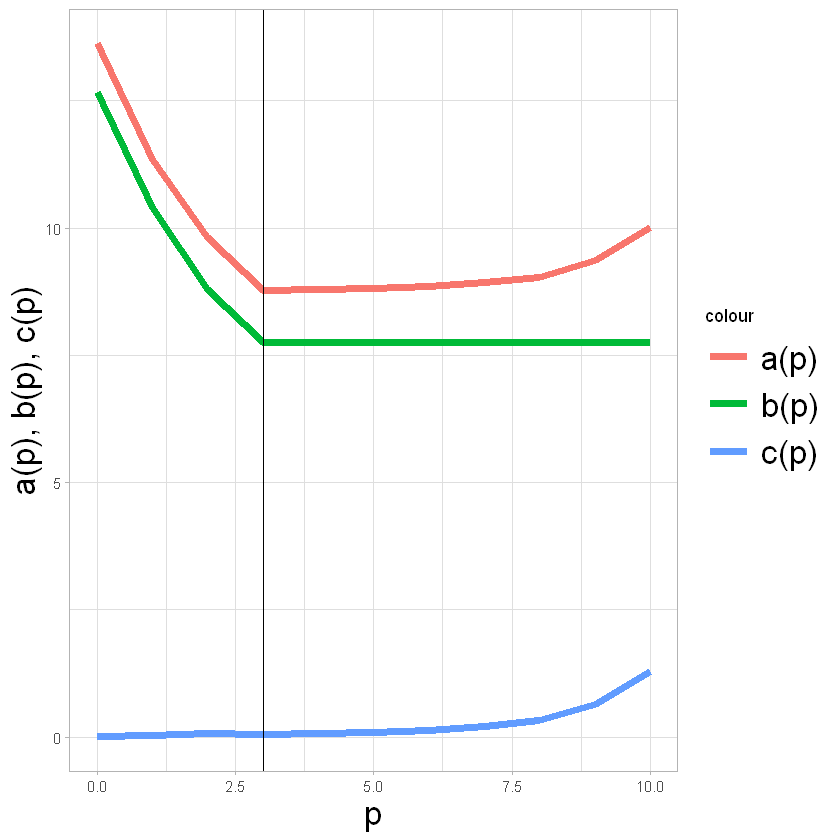

In [17]:
library(dplyr)
library(ggplot2)
graph1 <-pabc %>% ggplot()  +
    geom_line(aes(x=p, y=pabc[,3], colour="b(p)"), size=2) +
    geom_line(aes(x=p, y=pabc[,4], color="c(p)"), size=2) +
    xlab("p") + ylab("a(p), b(p), c(p)") +theme_light() +
    theme(axis.title=element_text(size=20),legend.text = element_text(size=20),
          legend.key.size = unit(1, 'cm')) +
    geom_line(aes(x=p, y=pabc[,2], colour="a(p)"), size=2) +
    geom_vline(xintercept=3)
graph1 

* What do you think the functions a(p), b(p), c(p) represent? 

> I think a(p) represents the empirical risk- averaged over the sampling distribution. <br>
<br>
> b(p) represents the squared bias of $ \hat{g}^{(r)}_p $ , averaged over all the observations in a sample, then averaged over the sampling distribution. It does not make sense to average it over the sampling distribution because an estimator's bias does not depend on an individual sample. 
<br>
<br>
> c(p) represents the variance of the predicted g, averaged over the sampling distribution, then averaged over all observations.

* Given your results, what value of p would you recommend for the purpose of prediction in this context? 

> For the purpose of prediction, we would want to minimize empirical risk. This is because minimizing the bias runs the risk of overfitting, and minimizing the variance does not guarantee anything. The value of p that minimizes empirical risk is shown to be p=3 

In [22]:
proc.time() - ptm

   user  system elapsed 
 194.74    1.28  197.40 